In [11]:
import matplotlib.pyplot as plt
import scipy
import sympy
import numpy as np
import control 
import os
import array_to_latex as a2l
from LatexGapFiller import LatexGapFiller, TextSheet
from ControlTheoryToolbox import System, CToolbox

# Task 1

In [12]:
def modeling(A, B, K):
    ss = control.ss((A + B @ K), B*0, A * 0, B * 0)

    time = np.linspace(0, 3, 1000)
    output = control.forced_response(ss, X0=[1, 1, 1, 1], T=time).states

    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)
    for i in range(4):
        axs[i//2, i % 2].plot(time, output[i], linewidth=4)
        # axs[i//2, i % 2].scatter(t[-1], x1[i], color='r', linewidth=4, label='goal')
        axs[i//2, i % 2].set_title(f'x_{i} = x_{i}(t)', fontsize=12)
        axs[i//2, i % 2].set_xlabel(f"t, [c]", fontsize=12)
        axs[i//2, i % 2].grid(True)
        axs[i//2, i % 2].legend()
        
        
    # axs[1, 1].plot(t, np.array(U).reshape(-1), linewidth=4)
    # axs[1, 1].set_title(f'u = u(t)', fontsize=12)
    # axs[1, 1].set_xlabel(f"t, [c]", fontsize=12)
    # axs[1, 1].grid(True)

In [13]:
gap_filler = LatexGapFiller()
A = np.array([
    [-5, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 2, 6],
    [0, 0, -6, 2],
])
B = np.array([
    [0],
    [1],
    [0],
    [3]
])


In [14]:
CToolbox.check_eigenvalues_controllable(A, B)

array([ True,  True, False,  True])

In [15]:
np.linalg.eig(A)[0]

array([ 2.+6.j,  2.-6.j, -5.+0.j,  0.+0.j])

In [16]:
desired_eigvalues = [-5, -5, -5, -5]
G = np.diag(desired_eigvalues)
G[0, 1] = 1
G[1, 2] = 1
G[2, 3] = 1
Y = np.array([[0, 1, 0, 0]])

In [17]:
CToolbox.check_system_observable(G, Y)

False

In [18]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
K = -Y @ np.linalg.pinv(P)

In [19]:
np.linalg.eig(A+B@K)[0]

array([-5.00003305+5.72532191e-05j, -5.00003305-5.72532191e-05j,
       -4.99993389+0.00000000e+00j, -5.        +0.00000000e+00j])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


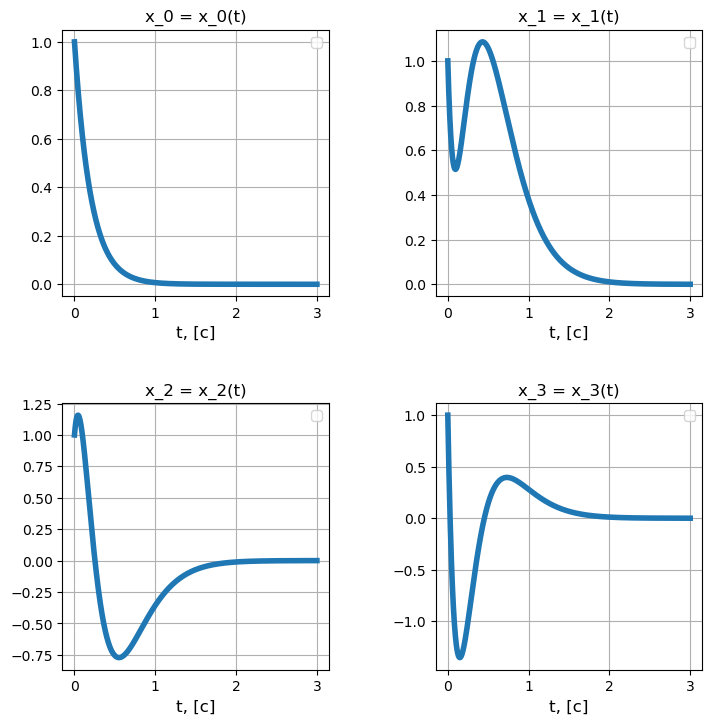

In [20]:
modeling(A, B, K)

Рассмотрим систему:

$$
    \dot{x} = Ax + Bu
$$
где согласно варианту: $A = {A}$, $B = {B}$

Найдем собственные числа матрицы $A$, получим: $\lambda = {lambdas}$. Проверив их на управляемость через матрицу Хаутуса получаем, что собственные числа $ {controllable_eigen_values}$ управляемы, а собственные числа $ {not_controllable_eigen_values}$ неуправляемы, но заметим, что эти числа явялются вещественными и отрицательными, а значит этим собственным числам и так соответсвуют устойчивые моды, а значит можно сделать вывод о том, что система стабилизируема, но не управляема.

Для желаемого спектра {desired_eigen_values} найдем соответствующую матрицу $K$. Для этого сначала составим матрицу $\Gamma$, с желаемым спектром, получим: $\Gamma = {G}$. К этой матрице $\Gamma$ подберем матрицу $Y$, такую, чтобы для пары $(Y, \Gamma)$ неуправляемые собственные числа матрицы $A$ были ненаблюдаемы. 
Возьмём $Y = {Y}$. Теперь решим уравнение Сильвестора вида $A P - P \Gamma = B Y$ и найдем $P$, получим $P = {P}$. Возьмём обратную от матрицы $P$, и найдем матрицу $K$ по формуле: $K = -Y P^{-1}$.
Получим $K = {K}$. 

Проведем моделирование и получим следующие графики:

\begin{figure}
    \centerline{\includegraphics[width=\linewidth]{ {image_name}}}
    \caption{Моделирование системы по заданию {id}}
    \label{11}
\end{figure}


In [39]:
desired_eigvalues = [-5, -50, -500, -500]
G = np.diag(desired_eigvalues)
G[2, 3] = 1
Y = np.array([[0, 1, 1, 0]])
G, Y

(array([[  -5,    0,    0,    0],
        [   0,  -50,    0,    0],
        [   0,    0, -500,    1],
        [   0,    0,    0, -500]]),
 array([[0, 1, 1, 0]]))

In [40]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
K = -Y @ np.linalg.pinv(P)

In [41]:
np.linalg.eig(A+B@K)[0]

array([-500.00000001+0.00421901j, -500.00000001-0.00421901j,
        -49.99999999+0.j        ,   -5.        +0.j        ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


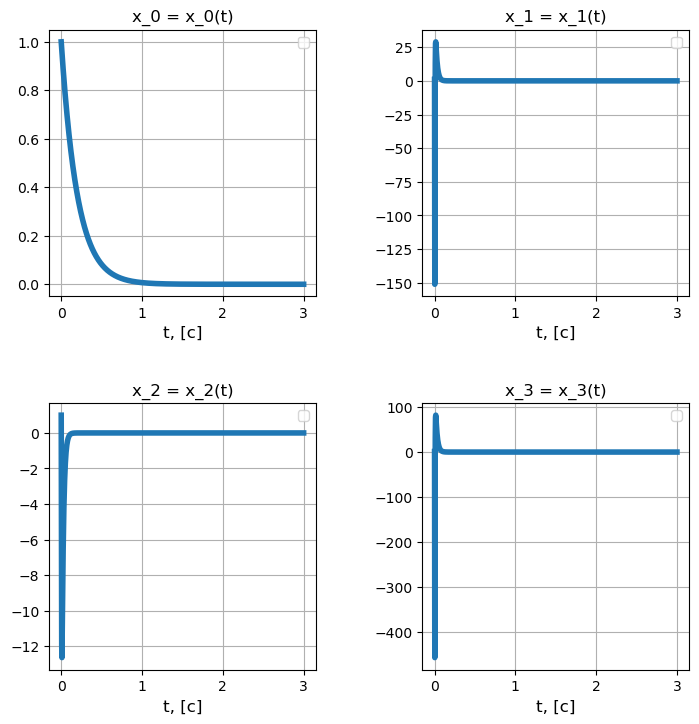

In [42]:
modeling(A, B, K)


Для желаемого спектра {desired_eigen_values} найдем соответствующую матрицу $K$. Для этого сначала составим матрицу $\Gamma$, с желаемым спектром, получим: $\Gamma = {G}$. К этой матрице $\Gamma$ подберем матрицу $Y$, такую, чтобы для пары $(Y, \Gamma)$ неуправляемые собственные числа матрицы $A$ были ненаблюдаемы. 
Возьмём $Y = {Y}$. Теперь решим уравнение Сильвестора вида $A P - P \Gamma = B Y$ и найдем $P$, получим $P = {P}$. Возьмём обратную от матрицы $P$, и найдем матрицу $K$ по формуле: $K = -Y P^{-1}$.
Получим $K = {K}$. 

Проведем моделирование и получим следующие графики:

\begin{figure}
    \centerline{\includegraphics[width=\linewidth]{ {image_name}}}
    \caption{Моделирование системы по заданию {id}}
    \label{11}
\end{figure}


In [ ]:
desired_eigvalues = [-5, -50, 6j, -6j]
G = np.diag(desired_eigvalues)
G[3, 2] = 6
G[2, 3] = -6
G[2, 2] = 0
G[3, 3] = 0
Y = np.array([[0, 1, 1, 0]])
G, Y

In [ ]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
K = -Y @ np.linalg.pinv(P)

In [ ]:
np.linalg.eig(A+B@K)[0]

In [ ]:
modeling(A, B, K)